In [1]:
import pandas as pd

annotated = pd.read_csv("../data/annotated_behavioral.csv")
behavioral = pd.read_csv("../data/filtered_behavioral.csv")
likelihood = pd.read_csv("../data/annotated_likelihood.csv")

# Subselect based on layer
layer = 12
annotated = annotated[annotated["layer"] == layer]
likelihood = likelihood[likelihood["layer"] == layer]

data = pd.merge(annotated, behavioral, how="inner", on="sentence")

In [2]:
data.head()

,Unnamed: 0_x,sentence,layer,improbable_impossible_projection,impossible_inconceivable_projection,improbable_inconceivable_projection,Unnamed: 0_y,log-prob-5gram_mean,log-prob-gpt2-xl_mean,log-prob-pcfg_mean,rating_arousal_mean,rating_conversational_mean,rating_sense_mean,rating_gram_mean,rating_frequency_mean,rating_imageability_mean,rating_others_thoughts_mean,rating_physical_mean,rating_places_mean,rating_valence_mean
0,12,Taste that fowl and those fish.,12,195.00,-860.0,-660.0,50000,-3.512495,-5.150524,-13.097651,3.214286,2.750000,6.230769,6.153846,2.352941,4.187500,3.222222,5.538462,2.312500,2.411765
1,38,All sorts of treasure there too.,12,142.00,-952.0,-804.0,50001,-2.480811,-5.603484,-12.962321,4.437500,5.250000,6.062500,5.187500,3.333333,4.866667,2.631579,4.812500,3.714286,5.294118
2,64,The small flock of birds circled.,12,215.00,-1032.0,-816.0,50002,-3.003510,-5.171230,-11.160756,2.764706,3.466667,6.705882,6.352941,5.375000,6.375000,2.071429,5.000000,5.166667,3.722222
3,90,The music drums inside my head.,12,256.00,-980.0,-720.0,50003,-2.539896,-5.340505,-10.912933,3.785714,4.230769,6.235294,6.294118,4.071429,4.875000,4.785714,3.625000,1.833333,4.687500
4,116,They are very devoted and faithful.,12,48.75,-992.0,-940.0,50004,-2.598408,-4.697894,-9.403047,2.615385,5.111111,6.941176,6.941176,5.470588,3.461538,5.125000,1.500000,1.375000,5.157895


Compute Correlation between projections and behavioral features

In [3]:
from scipy.stats import pearsonr
import numpy as np

metrics =  [
            "likelihood",
            "log-prob-5gram_mean",
            "log-prob-gpt2-xl_mean",
            "log-prob-pcfg_mean",
            "rating_arousal_mean",
            "rating_conversational_mean",
            "rating_sense_mean",
            "rating_gram_mean",
            "rating_frequency_mean",
            "rating_imageability_mean",
            "rating_others_thoughts_mean",
            "rating_physical_mean",
            "rating_places_mean",
            "rating_valence_mean",
        ]

projections = ["improbable_impossible_projection",
               "impossible_inconceivable_projection",]

heatmap = np.zeros((len(projections), len(metrics)))

for proj_idx, projection in enumerate(projections):
    print("\n", projection, "\n##############")
    for m_idx, metric in enumerate(metrics):
        if metric == "likelihood":
            corr = np.abs(pearsonr(likelihood[projection], likelihood[metric]).statistic)
        else:
            corr = np.abs(pearsonr(data[projection], data[metric]).statistic)
        heatmap[proj_idx, m_idx] = corr
        print(metric, corr)


 improbable_impossible_projection 
##############
likelihood 0.7714784520198836
log-prob-5gram_mean 0.04374062911342066
log-prob-gpt2-xl_mean 0.1608589272238543
log-prob-pcfg_mean 0.017341546176624194
rating_arousal_mean 0.10823704761985822
rating_conversational_mean 0.07156434879194362
rating_sense_mean 0.13727359140510703
rating_gram_mean 0.10004676352423522
rating_frequency_mean 0.21150309606184634
rating_imageability_mean 0.35395102993931565
rating_others_thoughts_mean 0.021989942786375893
rating_physical_mean 0.3095791023838445
rating_places_mean 0.32819841209184014
rating_valence_mean 0.22459770898883463

 impossible_inconceivable_projection 
##############
likelihood 0.5107134822270766
log-prob-5gram_mean 0.2478179242528009
log-prob-gpt2-xl_mean 0.3181917790212003
log-prob-pcfg_mean 0.23190447632913075
rating_arousal_mean 0.24301414601296392
rating_conversational_mean 0.3470363601775393
rating_sense_mean 0.5114650287723829
rating_gram_mean 0.5031571982246621
rating_frequency_me

([<matplotlib.axis.XTick at 0x7f037fc10340>,
 [Text(0.5, 0, 'likelihood'),
  Text(1.5, 0, 'log-prob-5gram_mean'),
  Text(2.5, 0, 'log-prob-gpt2-xl_mean'),
  Text(3.5, 0, 'log-prob-pcfg_mean'),
  Text(4.5, 0, 'rating_arousal_mean'),
  Text(5.5, 0, 'rating_conversational_mean'),
  Text(6.5, 0, 'rating_sense_mean'),
  Text(7.5, 0, 'rating_gram_mean'),
  Text(8.5, 0, 'rating_frequency_mean'),
  Text(9.5, 0, 'rating_imageability_mean'),
  Text(10.5, 0, 'rating_others_thoughts_mean'),
  Text(11.5, 0, 'rating_physical_mean'),
  Text(12.5, 0, 'rating_places_mean'),
  Text(13.5, 0, 'rating_valence_mean')])

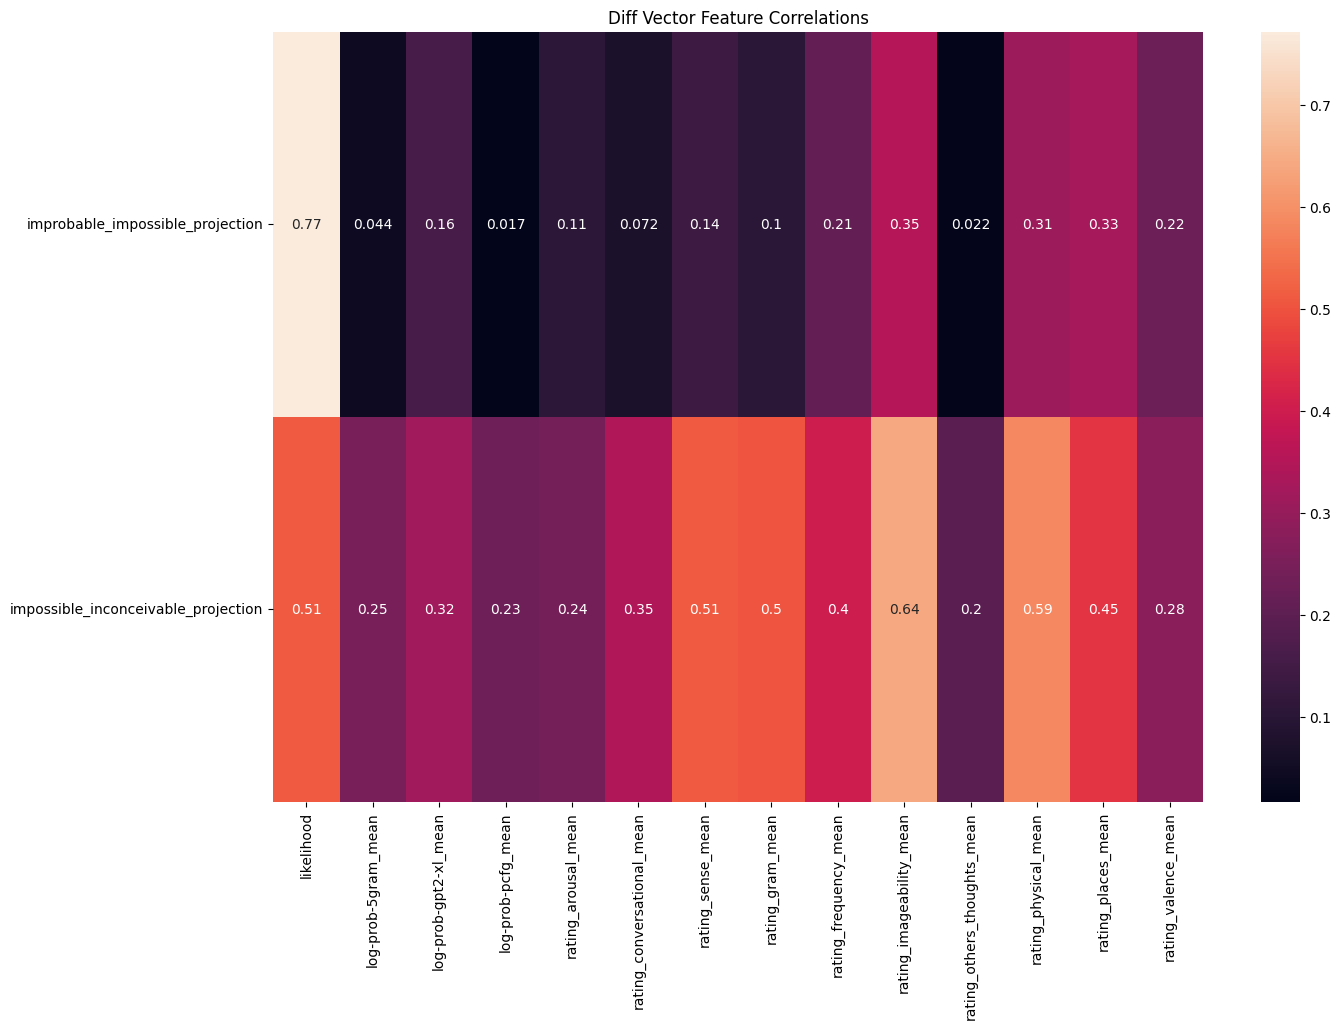

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
sns.heatmap(heatmap, annot=True)
plt.title("Diff Vector Feature Correlations")
plt.yticks(ticks=np.array(list(range(len(projections))))+.5, labels=projections, rotation=0)
plt.xticks(ticks=np.array(list(range(len(metrics)))) + .5, labels=metrics, rotation=90)

In [36]:
data = pd.read_csv("../data/annotated_likelihood.csv")

# Subselect based on layer
layer = 12
data = data[data["layer"] == layer]

In [37]:
from scipy.stats import pearsonr
import numpy as np

metrics =  [
            "likelihood",
        ]

projections = ["improbable_impossible_projection",
               "impossible_inconceivable_projection",]

heatmap = np.zeros((len(projections), len(metrics)))

for proj_idx, projection in enumerate(projections):
    print("\n", projection, "\n##############")
    for m_idx, metric in enumerate(metrics):
        corr = np.abs(pearsonr(data[projection], data[metric]).statistic)
        heatmap[proj_idx, m_idx] = corr
        print(metric, corr)


 improbable_impossible_projection 
##############
likelihood 0.7714784520198836

 impossible_inconceivable_projection 
##############
likelihood 0.5107134822270766
